In [41]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False


In [22]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

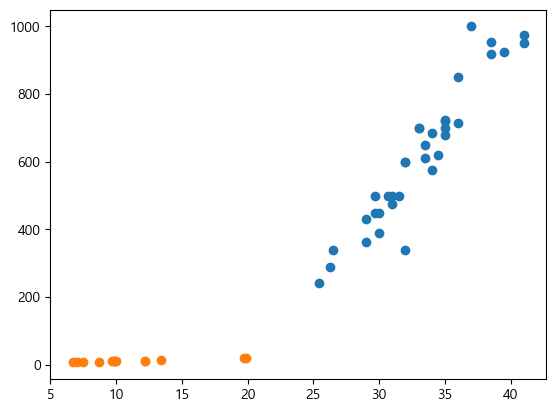

In [7]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_weight,smelt_weight)
plt.show()

In [23]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
results = [1]*35+[0]*14

In [10]:
results

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [21]:
datas =[length,weight,results]
df = pd.DataFrame(datas)
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,25.4,26.3,26.5,29.0,29.0,29.7,29.7,30.0,30.0,30.7,...,11.2,11.3,11.8,11.8,12.0,12.2,12.4,13.0,14.3,15.0
1,242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,450.0,500.0,...,9.8,8.7,10.0,9.9,9.8,12.2,13.4,12.2,19.7,19.9
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
datas = []
for i in range(len(results)):
    datas.append([length[i],weight[i],results[i]])

datas
df = pd.DataFrame(datas)
df


,0,1,2
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


In [26]:
datas = [ [l,w,r] for l,w,r in zip(length,weight,results)]
datas

[[25.4, 242.0, 1],
 [26.3, 290.0, 1],
 [26.5, 340.0, 1],
 [29.0, 363.0, 1],
 [29.0, 430.0, 1],
 [29.7, 450.0, 1],
 [29.7, 500.0, 1],
 [30.0, 390.0, 1],
 [30.0, 450.0, 1],
 [30.7, 500.0, 1],
 [31.0, 475.0, 1],
 [31.0, 500.0, 1],
 [31.5, 500.0, 1],
 [32.0, 340.0, 1],
 [32.0, 600.0, 1],
 [32.0, 600.0, 1],
 [33.0, 700.0, 1],
 [33.0, 700.0, 1],
 [33.5, 610.0, 1],
 [33.5, 650.0, 1],
 [34.0, 575.0, 1],
 [34.0, 685.0, 1],
 [34.5, 620.0, 1],
 [35.0, 680.0, 1],
 [35.0, 700.0, 1],
 [35.0, 725.0, 1],
 [35.0, 720.0, 1],
 [36.0, 714.0, 1],
 [36.0, 850.0, 1],
 [37.0, 1000.0, 1],
 [38.5, 920.0, 1],
 [38.5, 955.0, 1],
 [39.5, 925.0, 1],
 [41.0, 975.0, 1],
 [41.0, 950.0, 1],
 [9.8, 6.7, 0],
 [10.5, 7.5, 0],
 [10.6, 7.0, 0],
 [11.0, 9.7, 0],
 [11.2, 9.8, 0],
 [11.3, 8.7, 0],
 [11.8, 10.0, 0],
 [11.8, 9.9, 0],
 [12.0, 9.8, 0],
 [12.2, 12.2, 0],
 [12.4, 13.4, 0],
 [13.0, 12.2, 0],
 [14.3, 19.7, 0],
 [15.0, 19.9, 0]]

In [30]:
# 데이터 셔플
idx = [i for i in range(49)]
random.shuffle(idx)
idx

[17,
 7,
 35,
 5,
 4,
 14,
 20,
 28,
 33,
 18,
 16,
 25,
 44,
 22,
 34,
 37,
 36,
 21,
 11,
 31,
 46,
 30,
 9,
 29,
 38,
 48,
 26,
 24,
 47,
 32,
 1,
 27,
 19,
 8,
 0,
 6,
 2,
 3,
 10,
 42,
 45,
 13,
 43,
 40,
 23,
 41,
 12,
 39,
 15]

In [33]:
idx[:35]

[17,
 7,
 35,
 5,
 4,
 14,
 20,
 28,
 33,
 18,
 16,
 25,
 44,
 22,
 34,
 37,
 36,
 21,
 11,
 31,
 46,
 30,
 9,
 29,
 38,
 48,
 26,
 24,
 47,
 32,
 1,
 27,
 19,
 8,
 0]

In [39]:
# 35개 데이터 분리
train_input = [datas[i][0:2] for i in idx[:35]]
test_input = [datas[i][0:2] for i in idx[35:]]
train_target = [datas[i][2] for i in idx[:35]]
test_target = [datas[i][2] for i in idx[35:]]
train_input
test_input


[[29.7, 500.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [31.0, 475.0],
 [11.8, 9.9],
 [12.4, 13.4],
 [32.0, 340.0],
 [12.0, 9.8],
 [11.3, 8.7],
 [35.0, 680.0],
 [11.8, 10.0],
 [31.5, 500.0],
 [11.2, 9.8],
 [32.0, 600.0]]

##### 머신러닝 구현

In [43]:
# 1. 데이터 전처리, NaN, 0, 타입, 표준화작업
# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 3. 데이터 예측
clf.predict(test_input)
# 4. 정확도 측정
clf.score(test_input,test_target)

1.0

In [46]:
clf.predict([[25,150]])

array([0])

In [ ]:
# plt.scatter(train_input)